<a href="https://colab.research.google.com/github/canhtc/KTCNPM/blob/master/K60_XT_%2BAT_%3D%3E_Total_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout
from tensorflow import keras
import warnings
from glob import glob
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
warnings.filterwarnings("ignore")

In [33]:
# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/test/data_10.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/test/data_6.csv'

path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/*.csv'
path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/test_k59/dataH.csv'




In [34]:

files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_xt = data['XT'].values
  data_at = data['AT'].values
  data_total_at = data['TOTAL_AT'].values

  # data = []
  # data.append(data_xt)
  # data.append(data_ac)
  # data.append(data_total_ac)

  # data = np.asarray(data)

  # scaler = StandardScaler()

  
  # data = scaler.fit_transform(data)

  # data_xt = data[0]
  # data_ac = data[1]
  # data_total_ac = data[2]

  # print(data_total_at)
  # scaler = MinMaxScaler()
  

#dung de lay du lieu theo cap
  data_input2D = []
  data_output1D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_xt[k])
      temp_2D.append(data_at[k])
      
      temp_3D.append(temp_2D)

    data_output1D.append(data_total_at[i])

    data_input2D.append(temp_3D)
  x_input.append(data_input2D)
  y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape(-1,3,2)
y_train = y_train.reshape(-1,1)
# print( x_train.shape, y_train.shape)
print ("INPUT:",x_train[:2])
print("OUTPUT:",y_train[:2])

['/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataA.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataB.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataC.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataD.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataE.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataF.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataG.csv']
INPUT: [[[0.13 4.  ]
  [0.17 5.  ]
  [0.24 6.  ]]

 [[0.17 5.  ]
  [0.24 6.  ]
  [0.29 7.  ]]]
OUTPUT: [[22]
 [22]]


In [35]:
n_input = 3
n_features = 2

model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()
# adam = Adam(lr=0.001) 
model.compile(optimizer='adam', loss='mse')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10)                520       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train, y_train, epochs=1000, validation_split=0.1, verbose=1, batch_size=3)

Train on 81 samples, validate on 10 samples
Epoch 1/1000
81/81 [==============================] - 0s 5ms/step - loss: 339.8471 - val_loss: 375.4874
Epoch 2/1000
81/81 [==============================] - 0s 839us/step - loss: 327.9106 - val_loss: 340.7282
Epoch 3/1000
81/81 [==============================] - 0s 829us/step - loss: 288.4324 - val_loss: 275.3687
Epoch 4/1000
81/81 [==============================] - 0s 875us/step - loss: 240.5481 - val_loss: 177.7776
Epoch 5/1000
81/81 [==============================] - 0s 865us/step - loss: 170.6251 - val_loss: 48.7442
Epoch 6/1000
81/81 [==============================] - 0s 875us/step - loss: 124.1699 - val_loss: 19.0151
Epoch 7/1000
81/81 [==============================] - 0s 993us/step - loss: 120.4366 - val_loss: 30.7851
Epoch 8/1000
81/81 [==============================] - 0s 910us/step - loss: 105.2427 - val_loss: 17.8283
Epoch 9/1000
81/81 [==============================] - 0s 887us/step - loss: 103.4454 - val_loss: 18.8712
Epoch 10/

actually:  [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
model:  [17.555271 18.347519 18.881042 19.14067  19.110802 19.079414 19.004913
 18.836803 18.79916  18.88609  19.096054 19.397816 19.80974  20.273518
 20.737309 21.202387]
pecent:  [array([80.37781], dtype=float32), array([85.543106], dtype=float32), array([88.77733], dtype=float32), array([90.28597], dtype=float32), array([90.1145], dtype=float32), array([89.93373], dtype=float32), array([89.50226], dtype=float32), array([88.51611], dtype=float32), array([88.29288], dtype=float32), array([88.807045], dtype=float32), array([90.02964], dtype=float32), array([91.74039], dtype=float32), array([93.99154], dtype=float32), array([96.416595], dtype=float32), array([98.73324], dtype=float32), array([99.045456], dtype=float32)]
accuracy:  [93.33315]


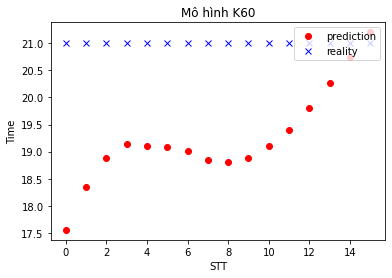

In [37]:

test = pd.read_csv(path_test)
ip_test_xt = test['XT'].values 
ip_test_at = test['AT'].values
test_output = test['TOTAL_AT'].values

scaler = MinMaxScaler(feature_range=(0, 1))
x_input=[]
y_output =[]

data_input2D = []
data_output1D = []
steps = 3

for i in range(0,len(ip_test_xt)-steps+1):
  temp_3D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_at[k])
    
    temp_3D.append(temp_2D)

  data_input2D.append(temp_3D)
x_input.append(data_input2D)


x_input = np.concatenate( x_input, axis=0 )

# print(x_input)
x_test = x_input.reshape(-1,3,2)
# print(x_test.shape)
result = model.predict(x_test)

test_output = test_output[:result.size]

plt.plot(result,'o', color='r')
plt.plot(test_output,'x', color='b')
plt.title("Mô hình K60")
plt.xlabel("STT")
plt.ylabel("Time")
print("actually: ",test_output)
print("model: ", result.reshape(result.size))
percent = []
for i in range(0,result.size):
  percent.append((1- abs(test_output[i]-result[i])/result[i])*100)

print("pecent: ", percent)
print("accuracy: ", acc/(result.size))
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()
acc = 0
for i in range(0,result.size):
  acc += (1- abs(test_output[i]-result[i])/result[i])*100
